In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Softsensor.ai\Data_problem  1.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Cleaning & Preparation

In [4]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.shape

(8950, 18)

In [8]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [9]:
data['CUST_ID'].nunique()

8950

In [10]:
data['MONTHLY_AVG_PURCHASE']=data['PURCHASES']/12
data['MONTHLY_AVG_CASH_ADVANCE']=data['CASH_ADVANCE']/12

In [11]:
data['MONTHLY_AVG_PURCHASE'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MONTHLY_AVG_PURCHASE, dtype: float64

In [12]:
data['MONTHLY_AVG_CASH_ADVANCE'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MONTHLY_AVG_CASH_ADVANCE, dtype: float64

In [13]:
data['LIMIT_USAGE']=data['BALANCE']/data['CREDIT_LIMIT']

In [14]:
data['LIMIT_USAGE'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: LIMIT_USAGE, dtype: float64

In [15]:
data['PAY_RATIO']=data['PAYMENTS']/data['MINIMUM_PAYMENTS']
data['PAY_RATIO'].head()

0    1.446508
1    3.826241
2    0.991682
3         NaN
4    2.771075
Name: PAY_RATIO, dtype: float64

In [16]:
data.columns= data.columns.str.lower()
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'monthly_avg_purchase', 'monthly_avg_cash_advance', 'limit_usage',
       'pay_ratio'],
      dtype='object')

In [17]:
data.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
monthly_avg_purchase                  0
monthly_avg_cash_advance              0
limit_usage                           1
pay_ratio                           313
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [19]:
data.corr()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,monthly_avg_purchase,monthly_avg_cash_advance,limit_usage,pay_ratio
balance,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692,0.181261,0.496692,0.503518,-0.041018
balance_frequency,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776,0.133674,0.099388,0.404557,-0.109040
purchases,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288,1.000000,-0.051474,-0.057464,0.015985
oneoff_purchases,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150,0.916845,-0.031326,-0.042254,0.009681
installments_purchases,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143,0.679896,-0.064244,-0.058318,0.019989
cash_advance,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312,-0.051474,1.000000,0.215171,-0.003820
purchases_frequency,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506,0.393017,-0.215507,-0.201944,0.010737
oneoff_purchases_frequency,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466,0.498430,-0.086754,-0.092089,-0.005361
purchases_installments_frequency,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275,0.315567,-0.177070,-0.161536,0.017532
cash_advance_frequency,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372,-0.120143,0.628522,0.360168,-0.022832


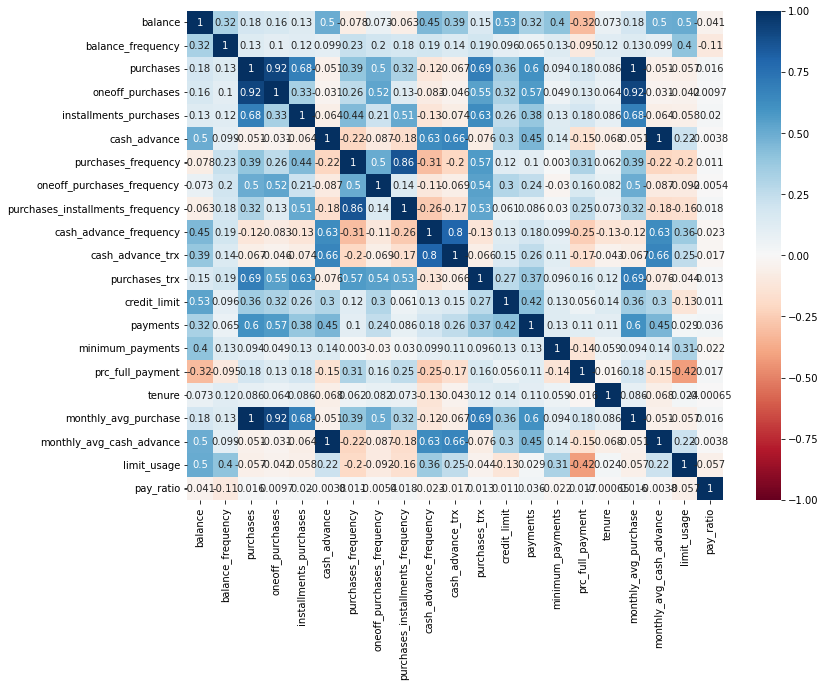

In [20]:
plt.figure(figsize = (12,9))
s=sns.heatmap(data.corr(),annot=True,cmap='RdBu',vmin=-1,vmax=1)

## Customer Segmentation on the basis of Purchase Behaviour

In [31]:
ca=data.iloc[:,[4,5]].values
ca

array([[   0.  ,   95.4 ],
       [   0.  ,    0.  ],
       [ 773.17,    0.  ],
       ...,
       [   0.  ,  144.4 ],
       [   0.  ,    0.  ],
       [1093.25,    0.  ]])

In [32]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(ca)
    wcss.append(kmeans.inertia_)

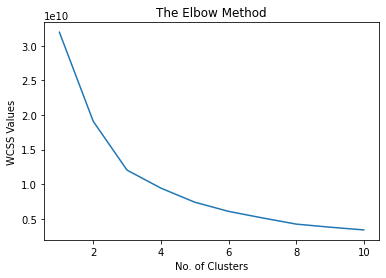

In [33]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

#### Elbow is at n=4

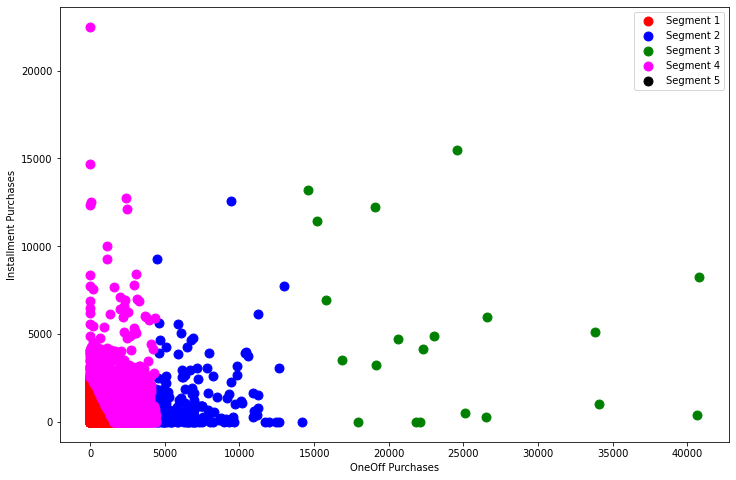

In [29]:
kmeansmodel=KMeans(n_clusters=4, init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(ca)
plt1 = plt.figure(figsize=(12,8))
plt.scatter(ca[y_kmeans==0,0], ca[y_kmeans==0,1], s=80, c='red',label='Segment 1')
plt.scatter(ca[y_kmeans==1,0], ca[y_kmeans==1,1], s=80, c='blue',label='Segment 2')
plt.scatter(ca[y_kmeans==2,0], ca[y_kmeans==2,1], s=80, c='green',label='Segment 3')
plt.scatter(ca[y_kmeans==3,0], ca[y_kmeans==3,1], s=80, c='magenta',label='Segment 4')
plt.scatter(ca[y_kmeans==4,0], ca[y_kmeans==4,1], s=80, c='black',label='Segment 5')
plt.xlabel('OneOff Purchases')
plt.ylabel('Installment Purchases')
plt.legend()
plt.show()

### <font color = 'red'>Segment 1 avoids spending as they make minimum to no purchases. Proposed strategy would be to analyse their interests and spending patterns by collecting data from social media via cookies and cater them accordingly i.e. providing them exactly what they are looking for.</font>
### <font color = 'magenta'>Segment 2 mostly uses the Credit Card for Installment Payments. Proposed strategy would be to provide them exclusive coupons and discounts at food chains, grocery stores and labels.</font>
### <font color = 'blue'>Segment 3 mostly uses the Credit Card for OneTime Payments and some Installments. Installemts are a good security for Credit Card companies therefore it is a good idea to engage customers into installment purchsases. Proposed strategy would be to provide cashbacks on bill payments or installment purchases.</font>
### <font color = 'green'>Segment 4 is the squander squad with high OneTime and Installment Purchases. These are our favourite customers and must be treated as such. From exclusive birthday and aniversary discounts to a dedicated Relationship Manager can be a good way to go. </font>

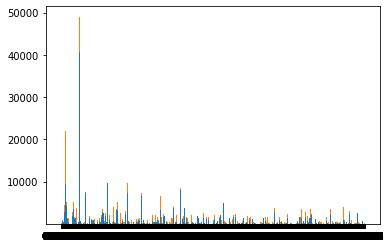

In [25]:
plt.bar(data['cust_id'],data['oneoff_purchases'], width=1)
plt.bar(data['cust_id'],data['installments_purchases'],width=1,bottom=data['oneoff_purchases'])
plt.show()

## Another K Means Cluster Segmenting Customers on the basis of their Balance and Cash Advance Behaviour

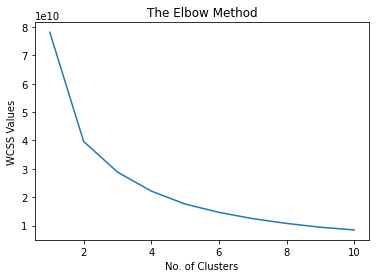

In [26]:
lu=data.iloc[:,[1,6]].values
wcss_2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(lu)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

#### Elbow is at n_clusters=3

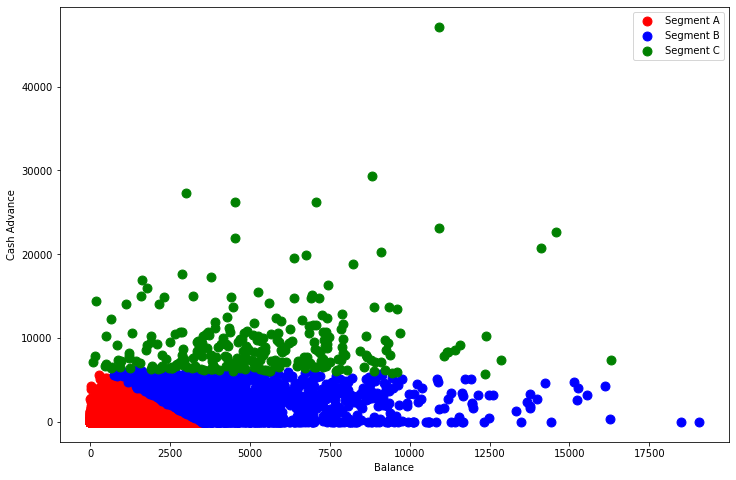

In [34]:
kmeansmodel=KMeans(n_clusters=3, init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(lu)
plt1 = plt.figure(figsize=(12,8))
plt.scatter(lu[y_kmeans==0,0], lu[y_kmeans==0,1], s=80, c='red',label='Segment A')
plt.scatter(lu[y_kmeans==1,0], lu[y_kmeans==1,1], s=80, c='blue',label='Segment B')
plt.scatter(lu[y_kmeans==2,0], lu[y_kmeans==2,1], s=80, c='green',label='Segment C')
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.legend()
plt.show()

### <font color= red>Segment A of Customers maintain a low Balance and avoid Cash Advance Withdrawal indicating their frequent Purchase behaviour. This segment can be lured to consider the Cash Advance option as it provides the company with a special Cash Advance Fee and a higher Interest Rate. This can be done by reducing the Cash Advance Fee or the Interest Rate or both on the basis of their Credit Score.</font>
### <font color=blue>Segment B of Customers avoid using the Cash Advance Option and maintain a decent Balance, indicating their low usage of Credit Cards. This segment is like the root node of segments 1 2, and 3. Thus the proposed strategy for all the 3 segments and segment A would prove fruitful for this paticular segment of customers.</font>
### <font color=green>Segment C of Customers are the frequent users of the Cash Advance Option. These are again special customers of the Bank and should be provided with exclusive special occasion discounts and a dedicated Relationship Manager.</font>

# Linear Relation Between Cash Advance Transaction & it's Frequency

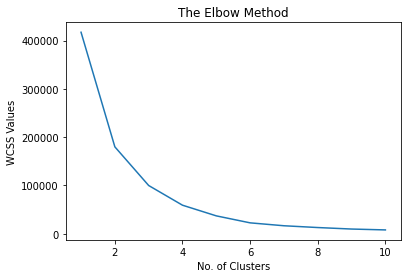

In [49]:
lub=data.iloc[:,[11,10]].values
wcss_3=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=0)
    kmeans.fit(lub)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Values')
plt.show()

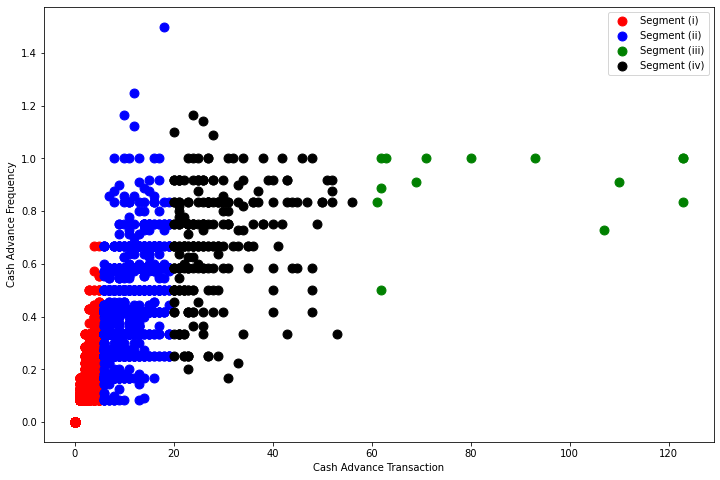

In [50]:
kmeansmodel=KMeans(n_clusters=4, init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(lub)
plt1 = plt.figure(figsize=(12,8))
plt.scatter(lub[y_kmeans==0,0], lub[y_kmeans==0,1], s=80, c='red',label='Segment (i)')
plt.scatter(lub[y_kmeans==1,0], lub[y_kmeans==1,1], s=80, c='blue',label='Segment (ii)')
plt.scatter(lub[y_kmeans==2,0], lub[y_kmeans==2,1], s=80, c='green',label='Segment (iii)')
plt.scatter(lub[y_kmeans==3,0], lub[y_kmeans==3,1], s=80, c='black',label='Segment (iv)')
plt.xlabel('Cash Advance Transaction')
plt.ylabel('Cash Advance Frequency')
plt.legend()
plt.show()

## A linear relation is observed between the Average amount per Cash Advance and the frequency of Cash Advance Withdrawal.
### <font color=red>Segment (i) of Customers make little to no use of Cash Advance and has not gained a habit of it</font>
### <font color=blue>Segment (ii) of Customers make moderate use of Cash Advance and is gaining a habit of it</font>
### <font color=green>Segment (iii) of Customers make huge Cash Advance Withdrawals with moderate frequency indicating a habit</font>
### <font color=black>Segment (iv) of Customers make high Cash Advance Withdrawals and with consistancy indicating a habit</font>

## Conclusion
## Segment 4, Segment C and Segment (iii) are the premium customers of the company. The company must make sure these segments are catered well remain connected. In case a customer from any of these segments comes accross an issue, the issue must be immediately resolved and rewards must be provided as an apology.
## Segment 2, Segment 3, Segment A and Segment (ii)(iii) must be confronted with frequent visual advertisements and discounts such that they remember to use their Credit Cards often. Habit forming temporary discounts and relaxations must be provided for a period of 3 months. Once the habit is formed, frequent use can be ensured.
## Segment 1, Segment B and segment (i) Customer behaviour must be analysed with the help of data from Social Media Cookies and specific plans must by fabricated to target them individually